In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.shape

(41188, 21)

## EDA

<AxesSubplot:xlabel='age', ylabel='Count'>

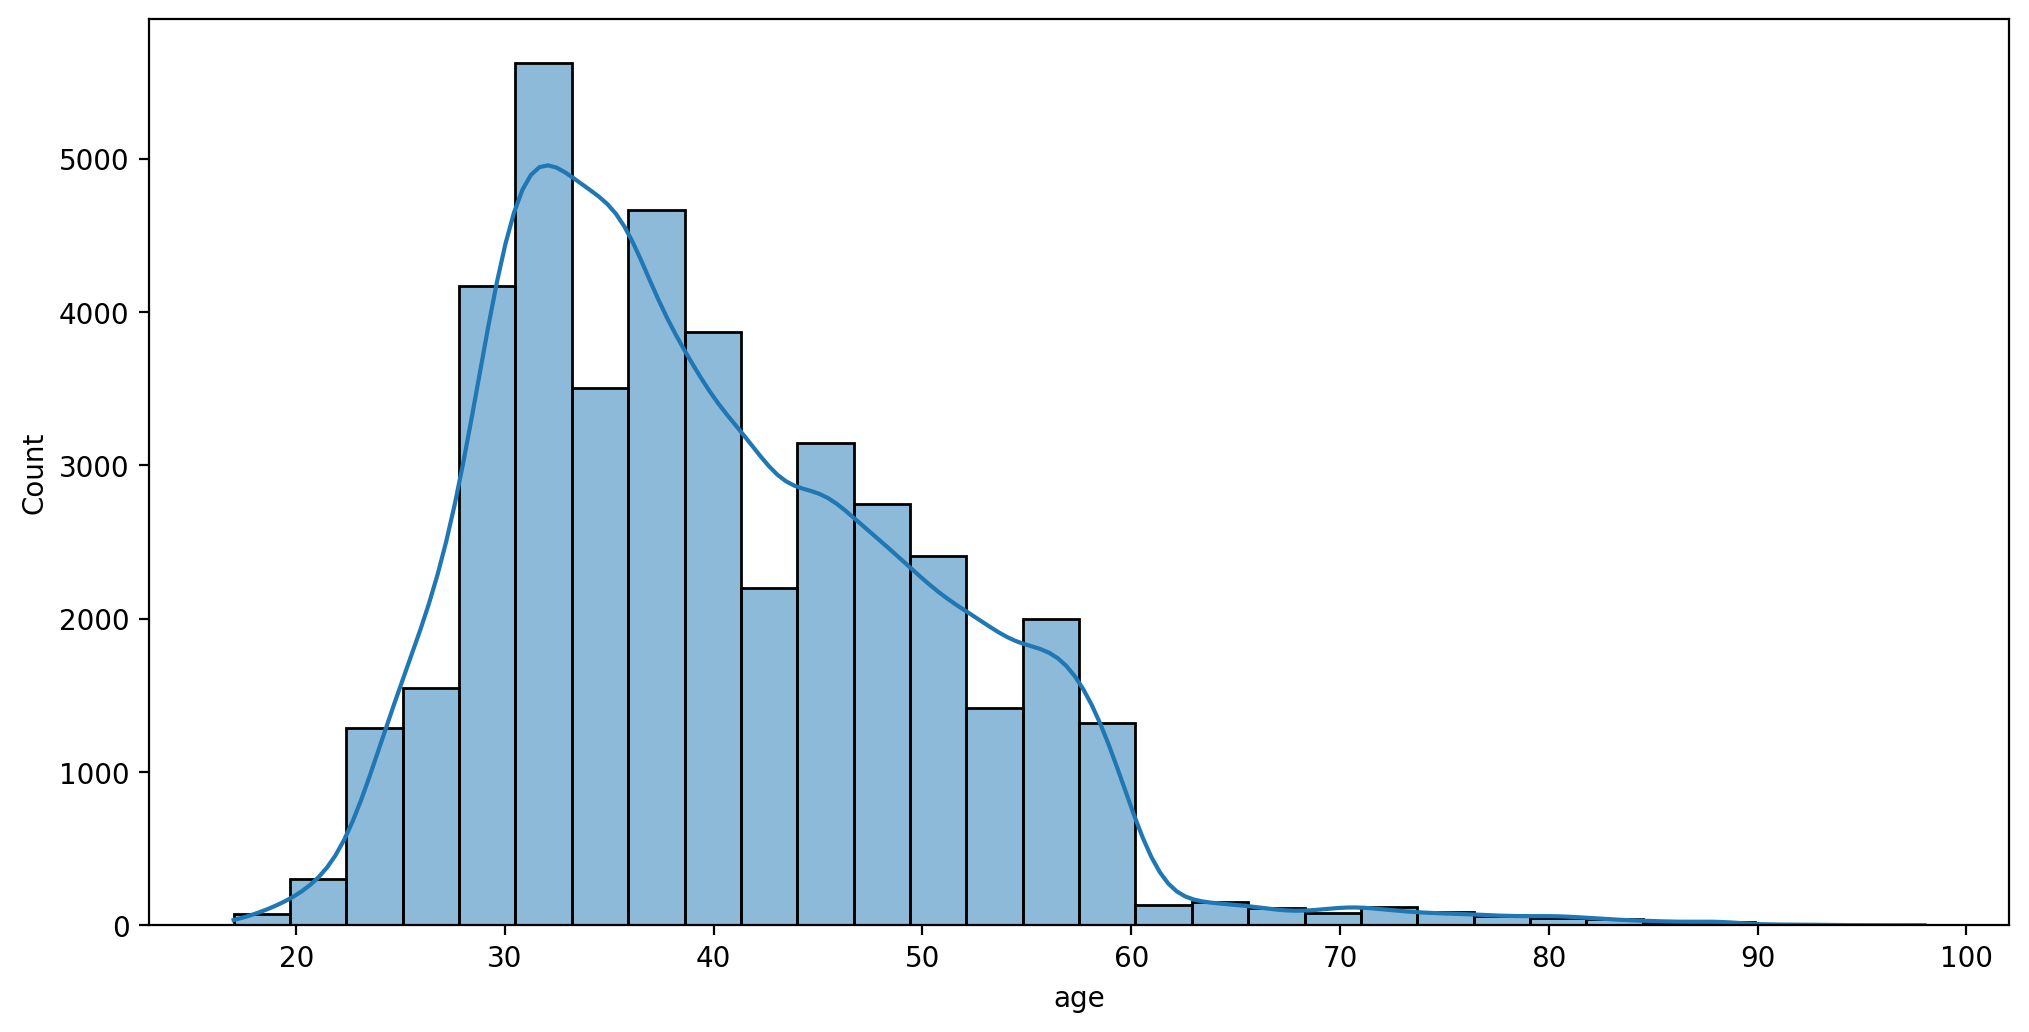

In [10]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data = df, x='age', bins=30,kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

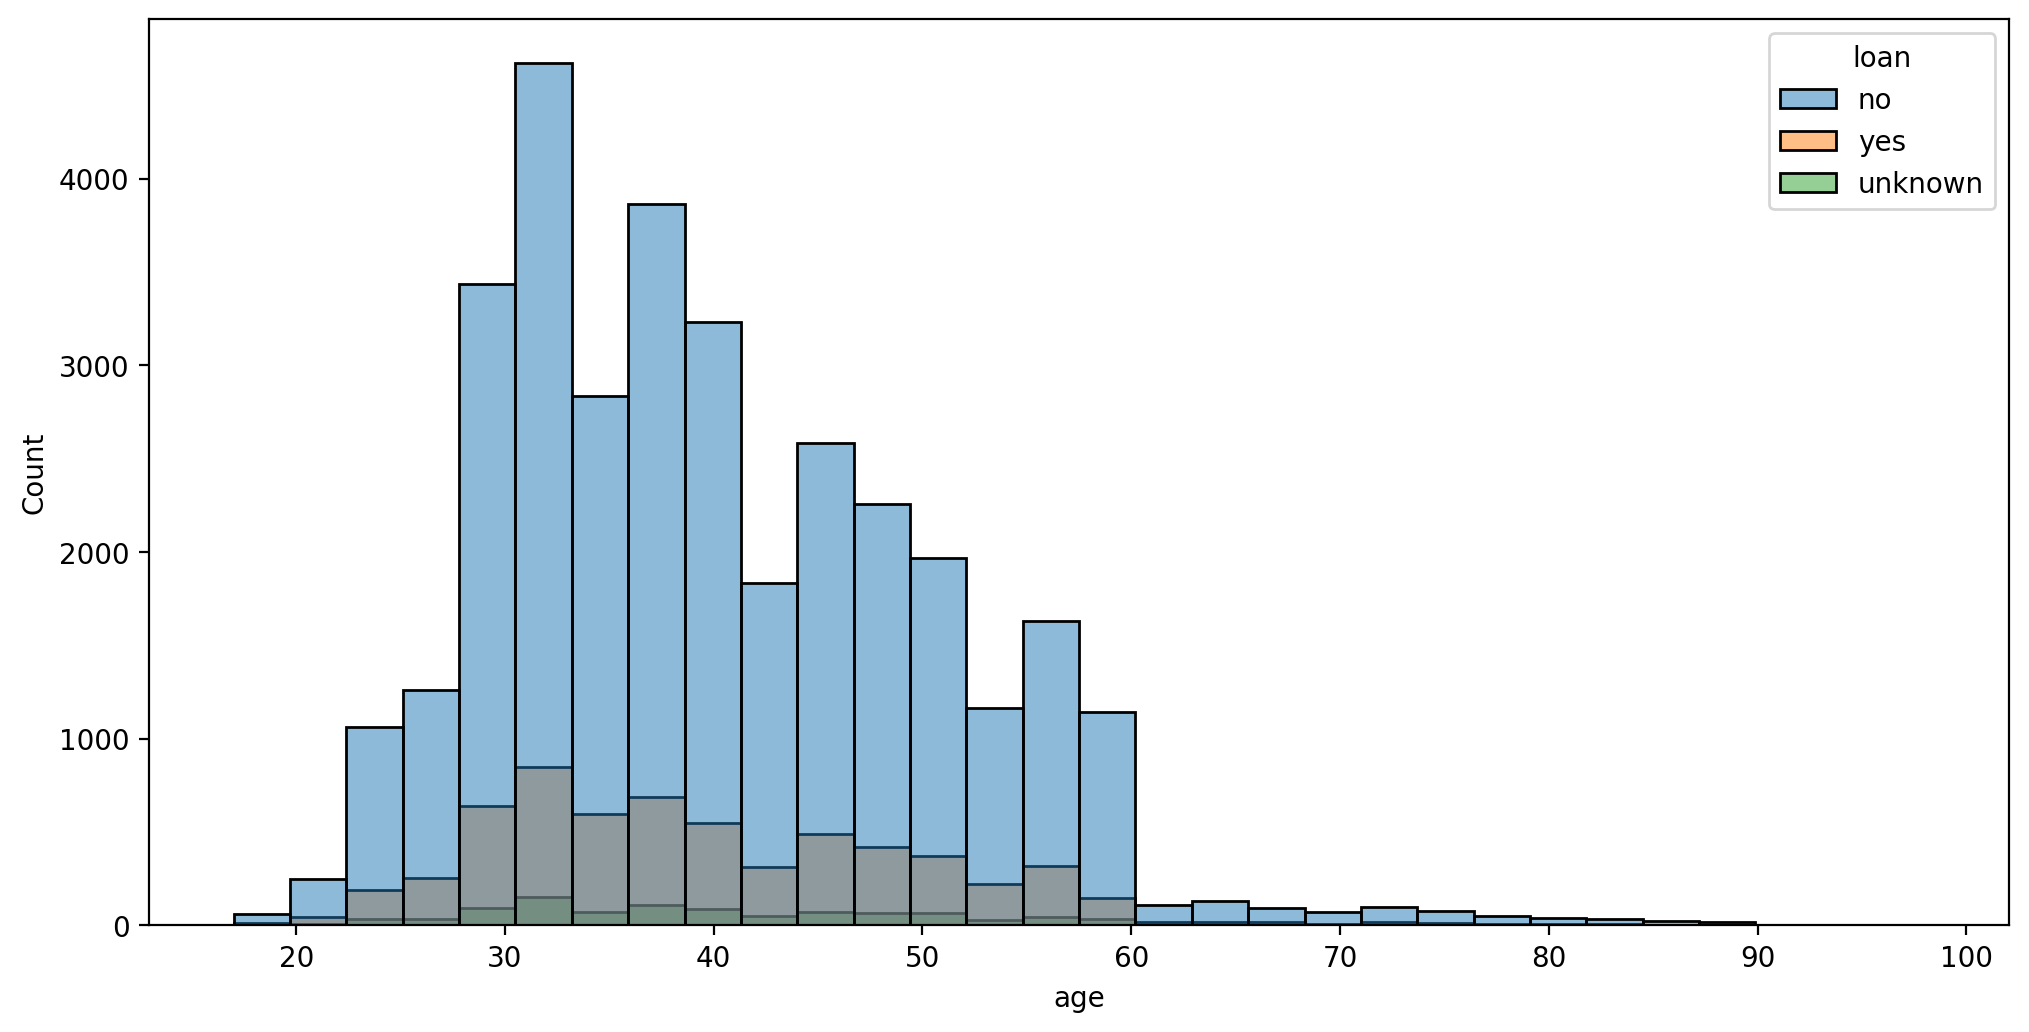

In [11]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data = df, x='age', bins=30, hue='loan')

(0.0, 30.0)

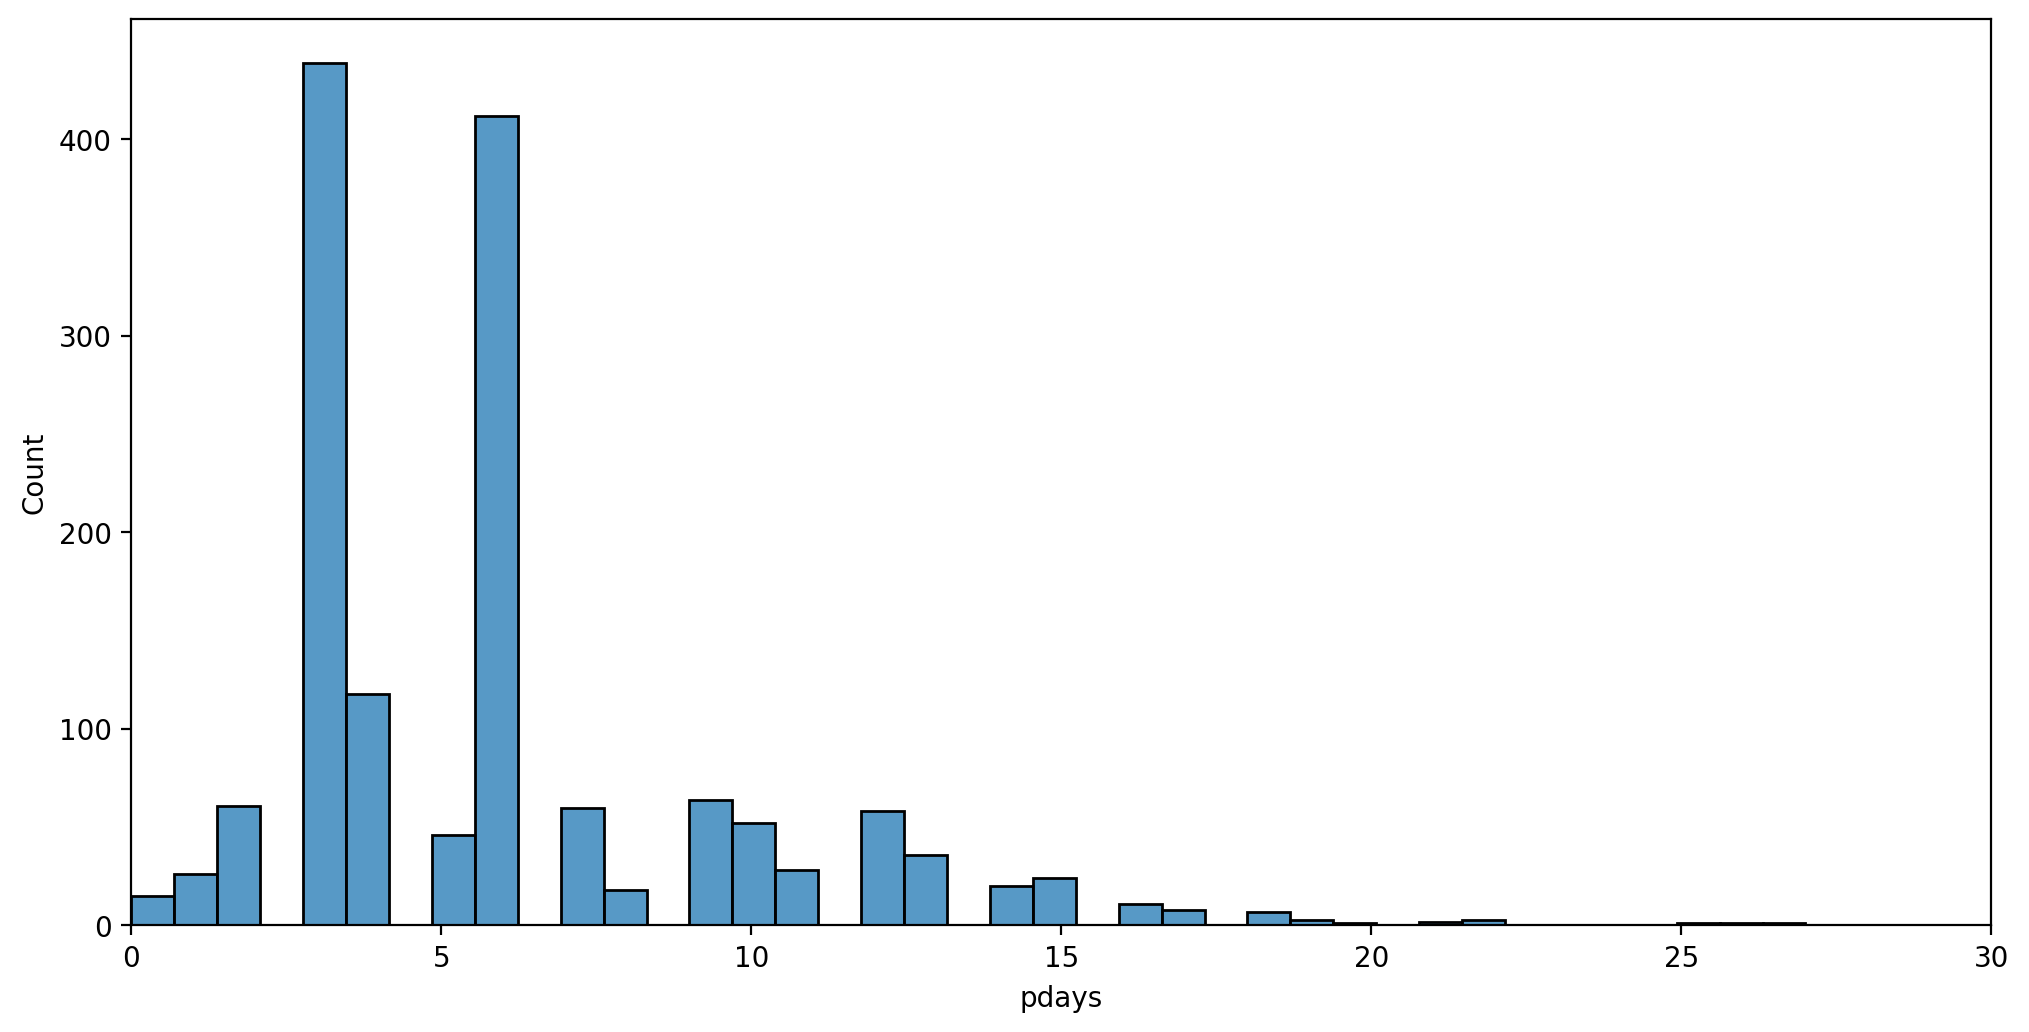

In [15]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data = df[df['pdays'] != 999], x='pdays')
plt.xlim(0,30)

In [19]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [21]:
df['duration'].sort_values()

33015       0
23031       0
28063       0
6251        0
28239       1
         ... 
7727     3631
13820    3643
40537    3785
22192    4199
24091    4918
Name: duration, Length: 41188, dtype: int64

(0.0, 1000.0)

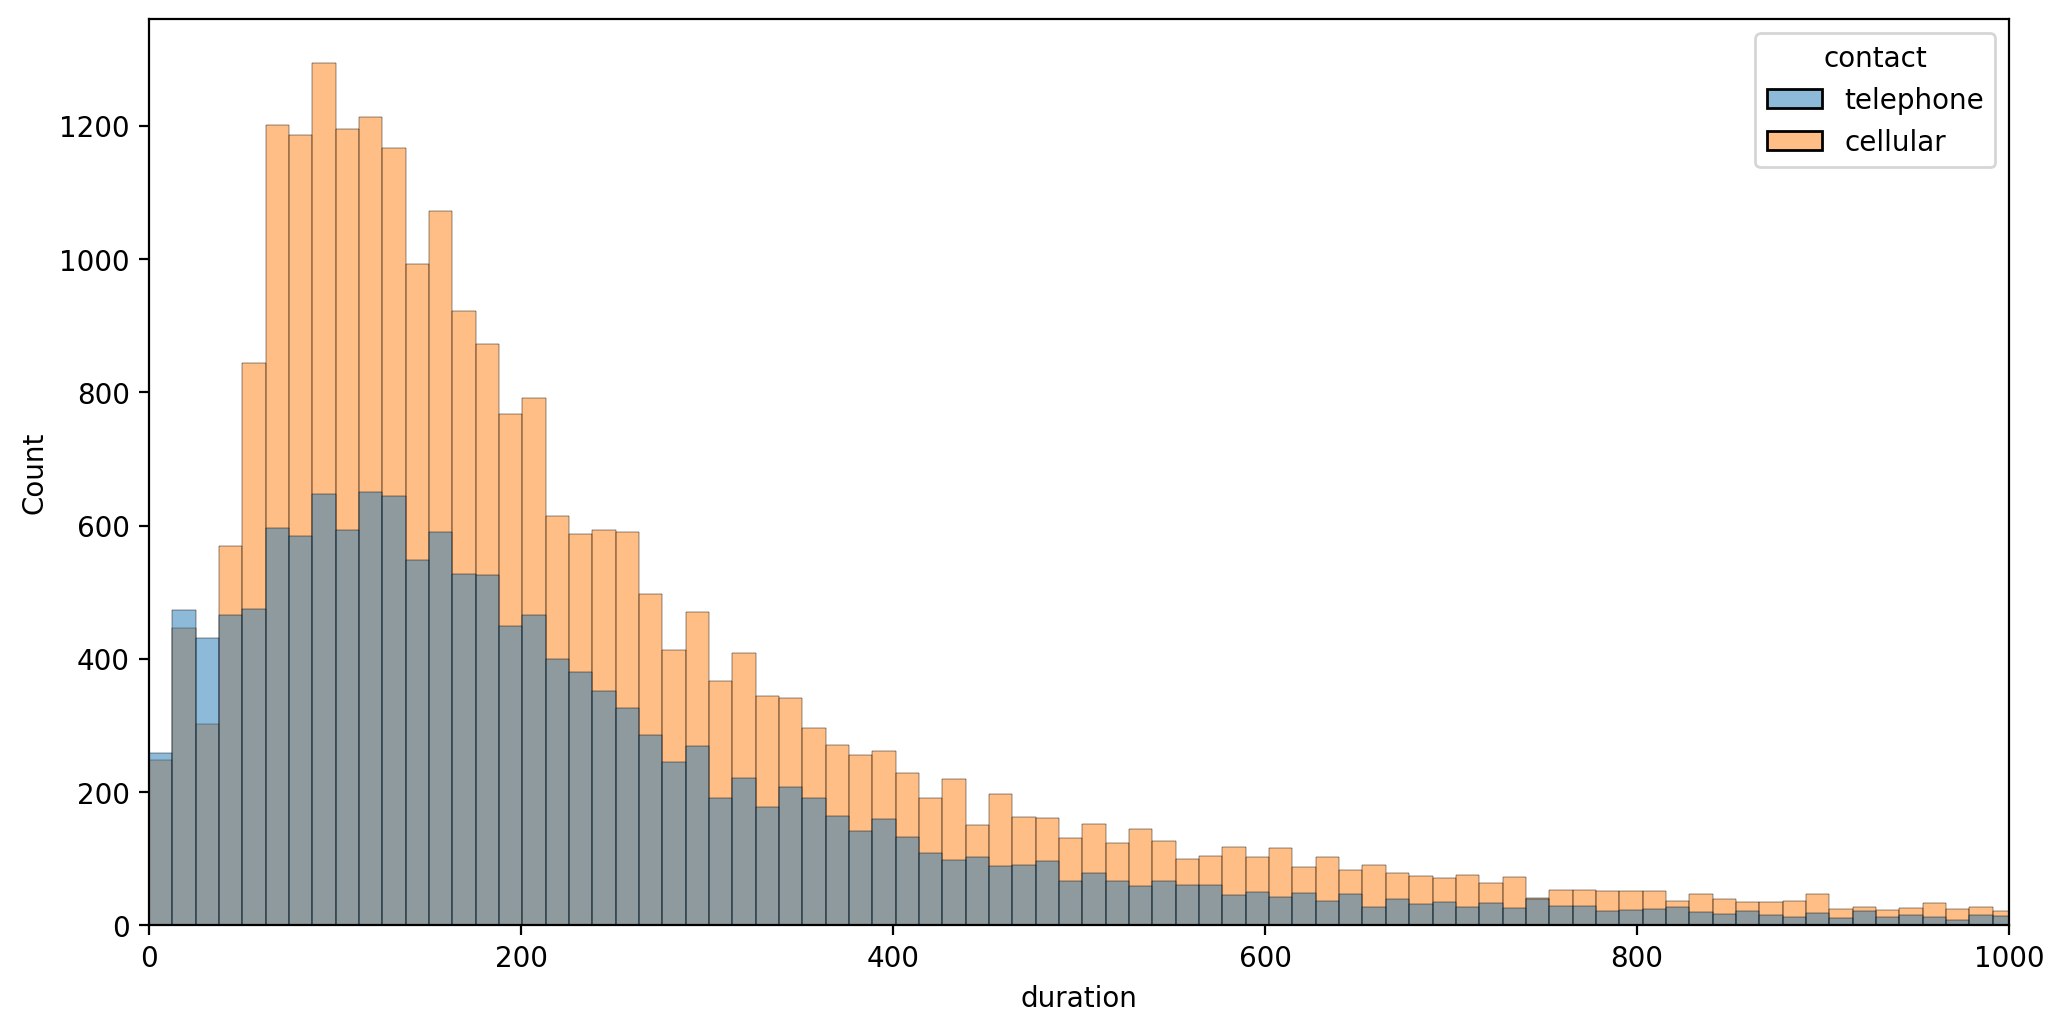

In [25]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data = df, x='duration', hue = 'contact')
plt.xlim(0,1000)

<AxesSubplot:xlabel='contact', ylabel='count'>

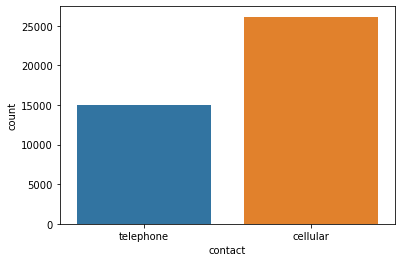

In [26]:
sns.countplot(data=df, x='contact')

In [34]:
df['job'].value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object')

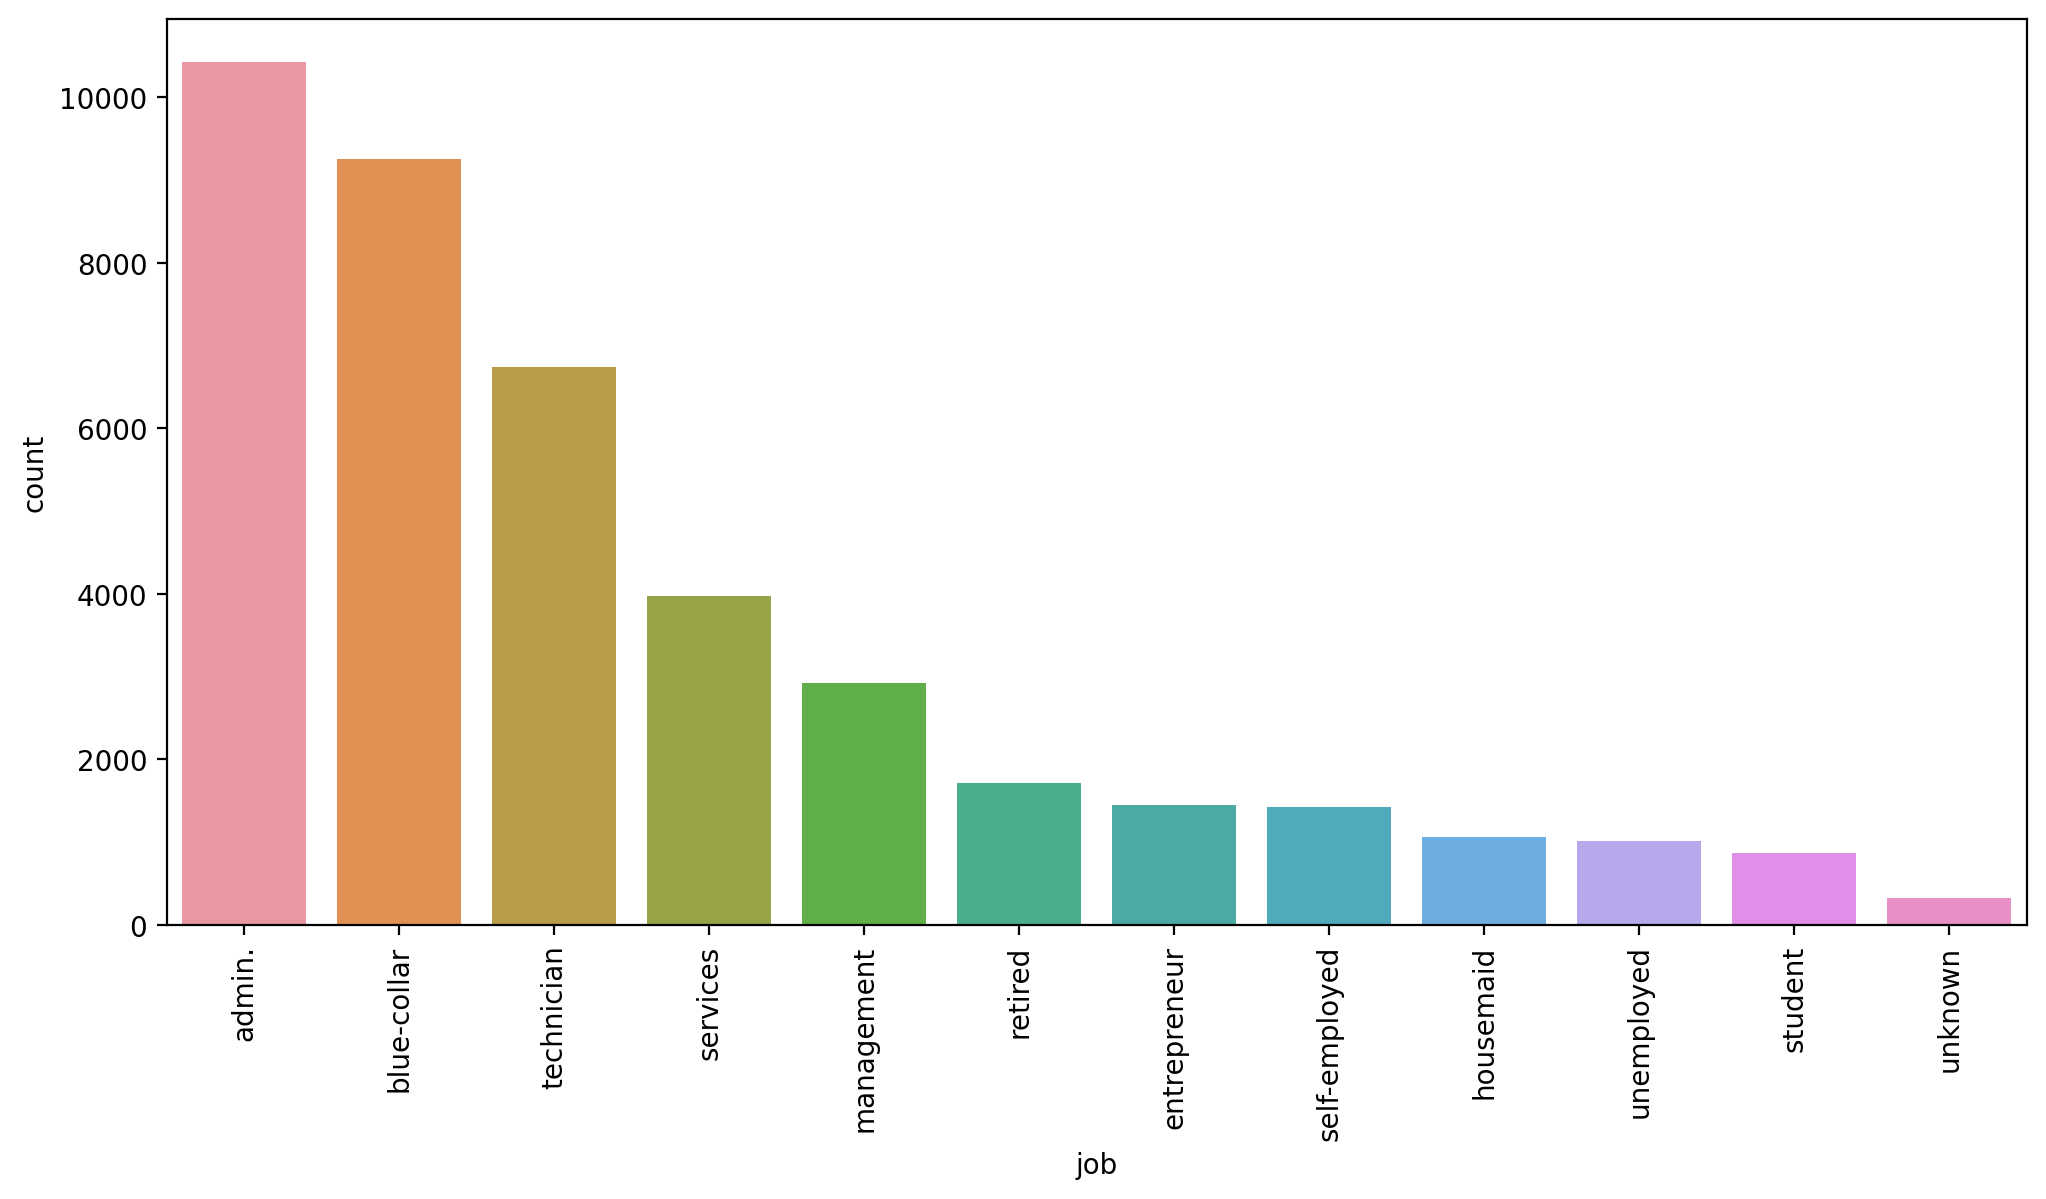

In [35]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.xticks(rotation=90);

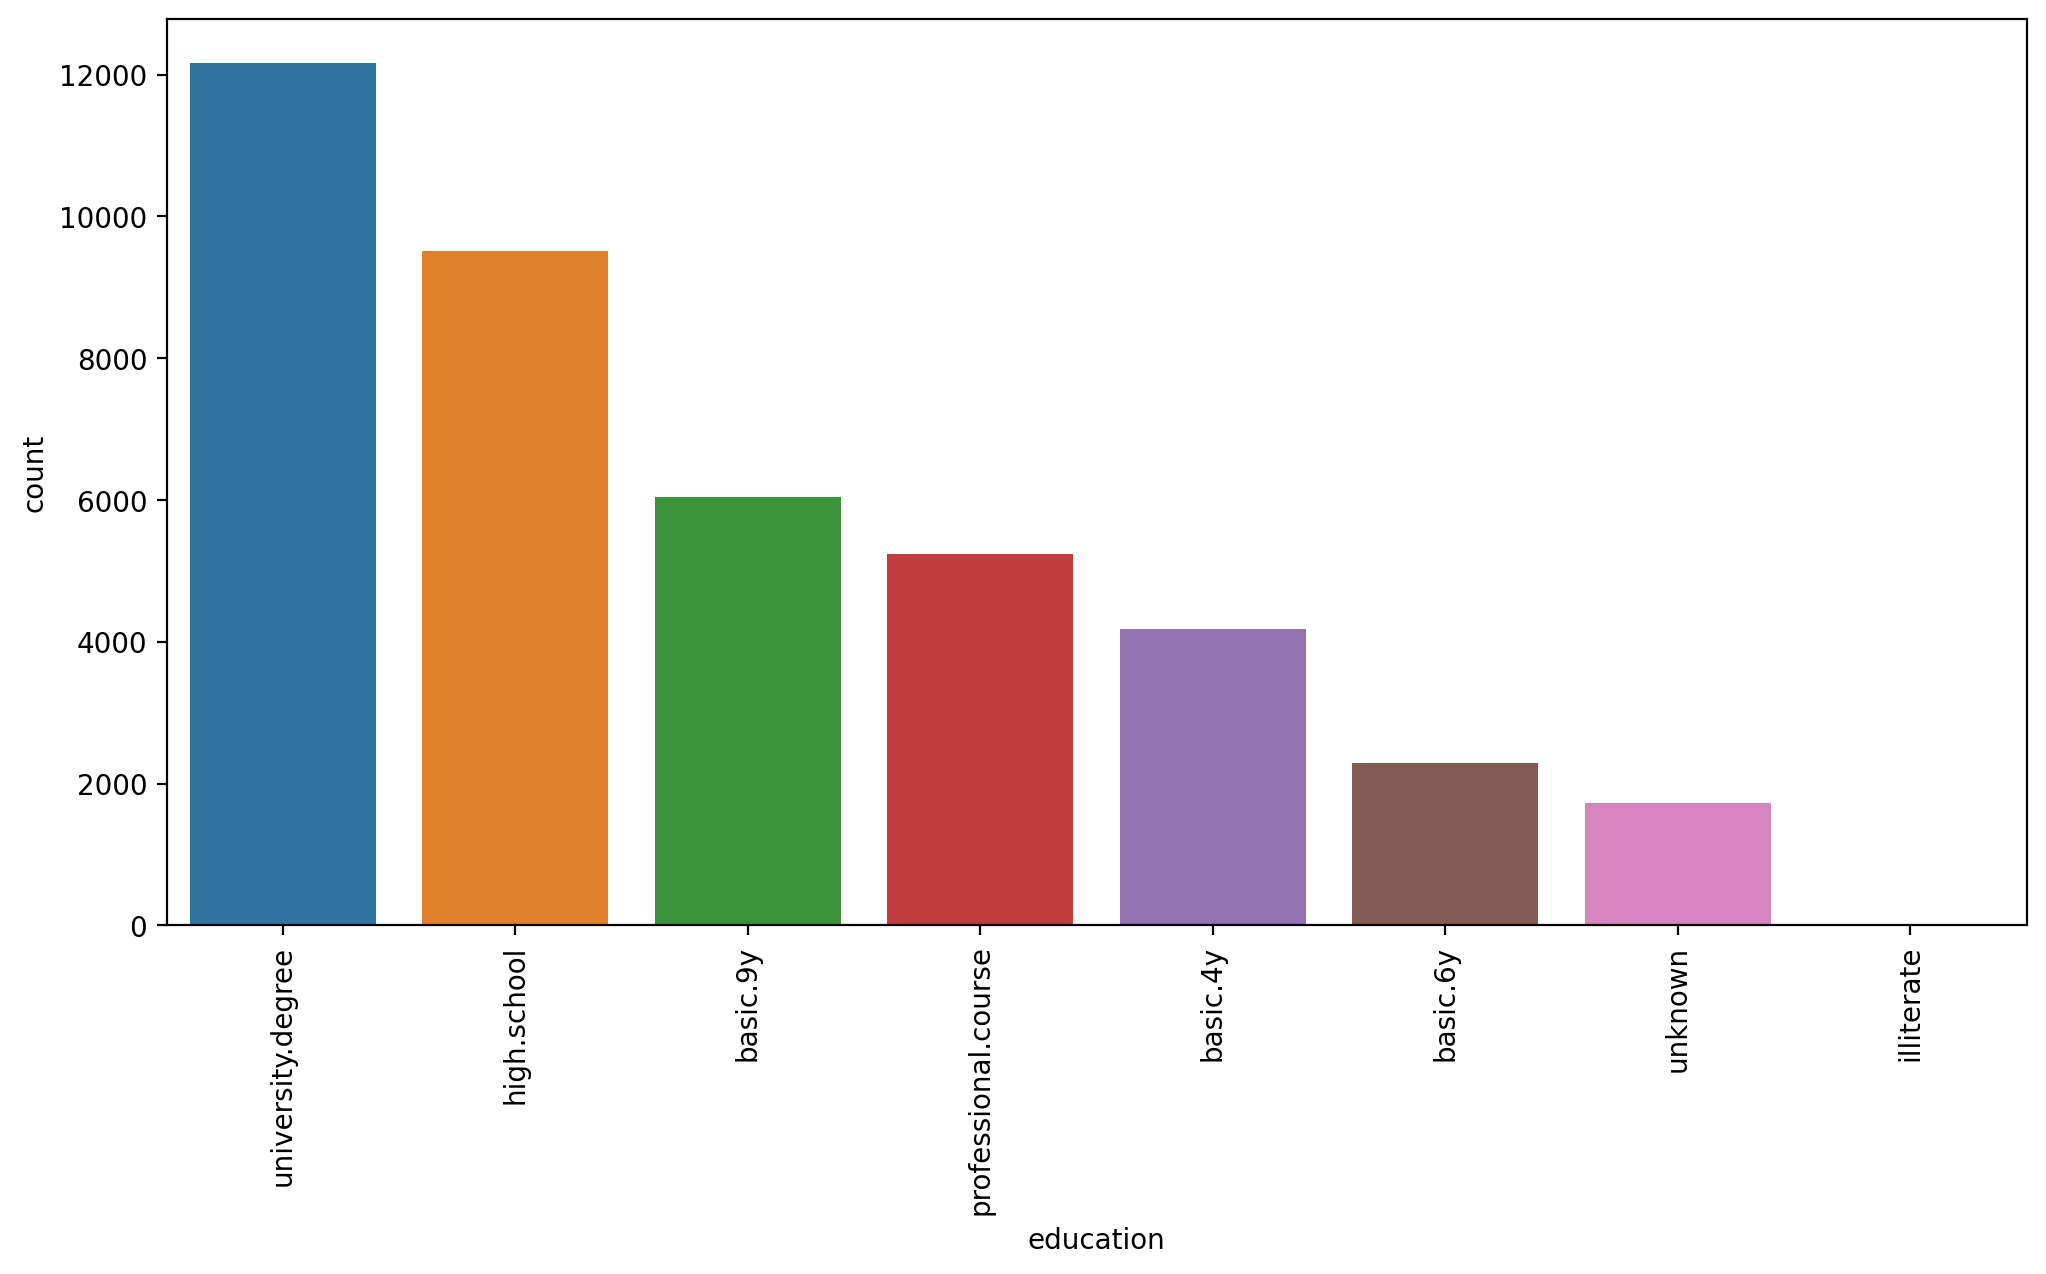

In [36]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.xticks(rotation=90);

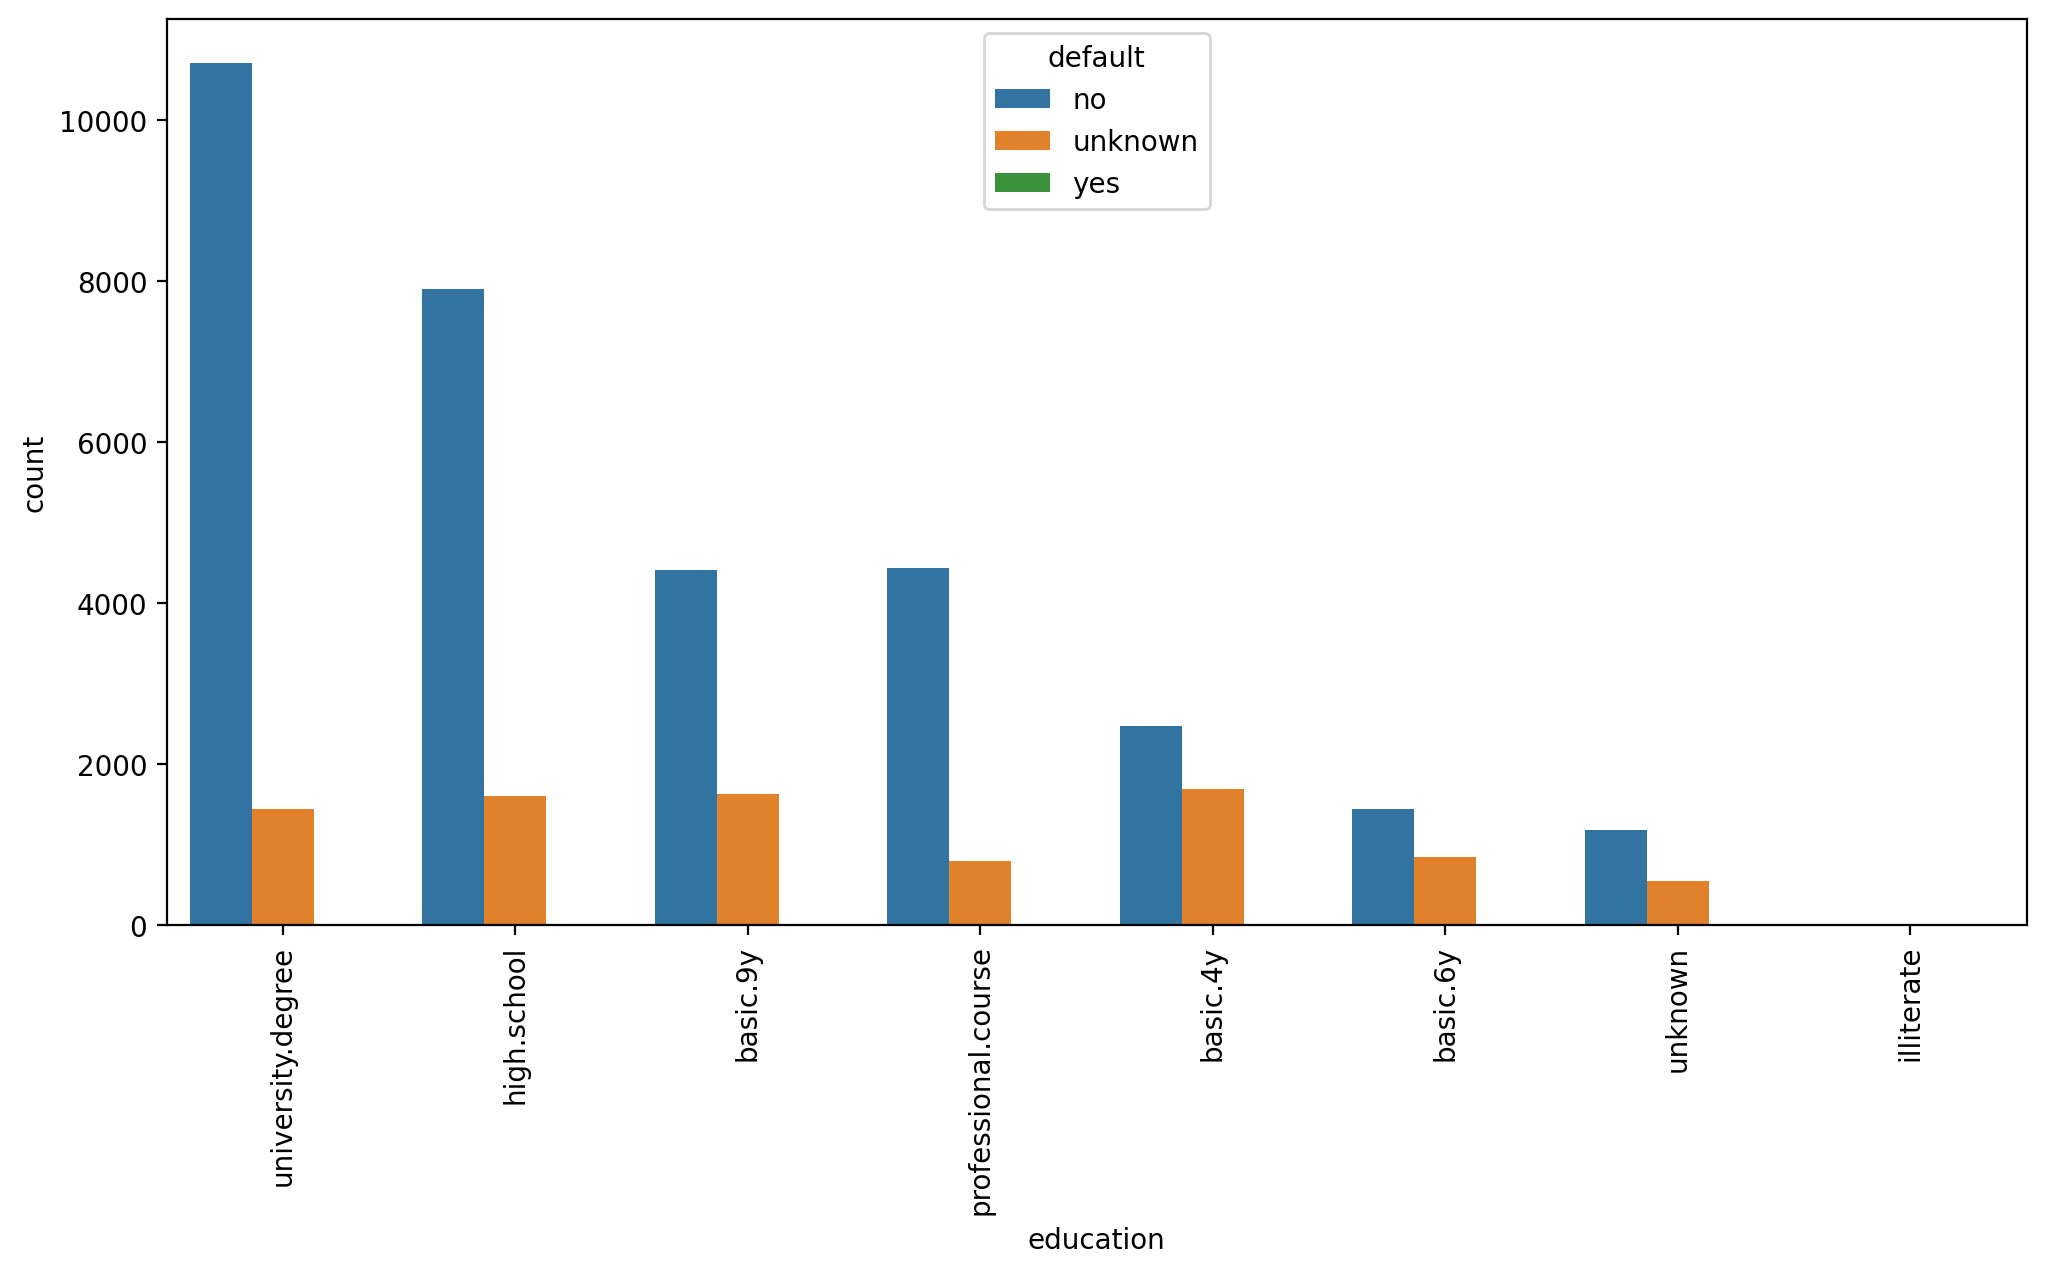

In [37]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, hue='default')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='default', ylabel='count'>

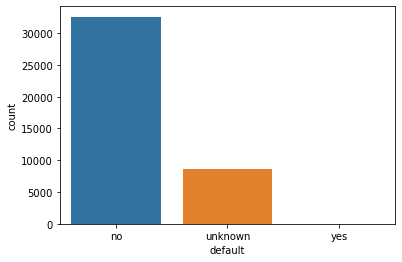

In [38]:
sns.countplot(data=df, x='default')

In [39]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [40]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

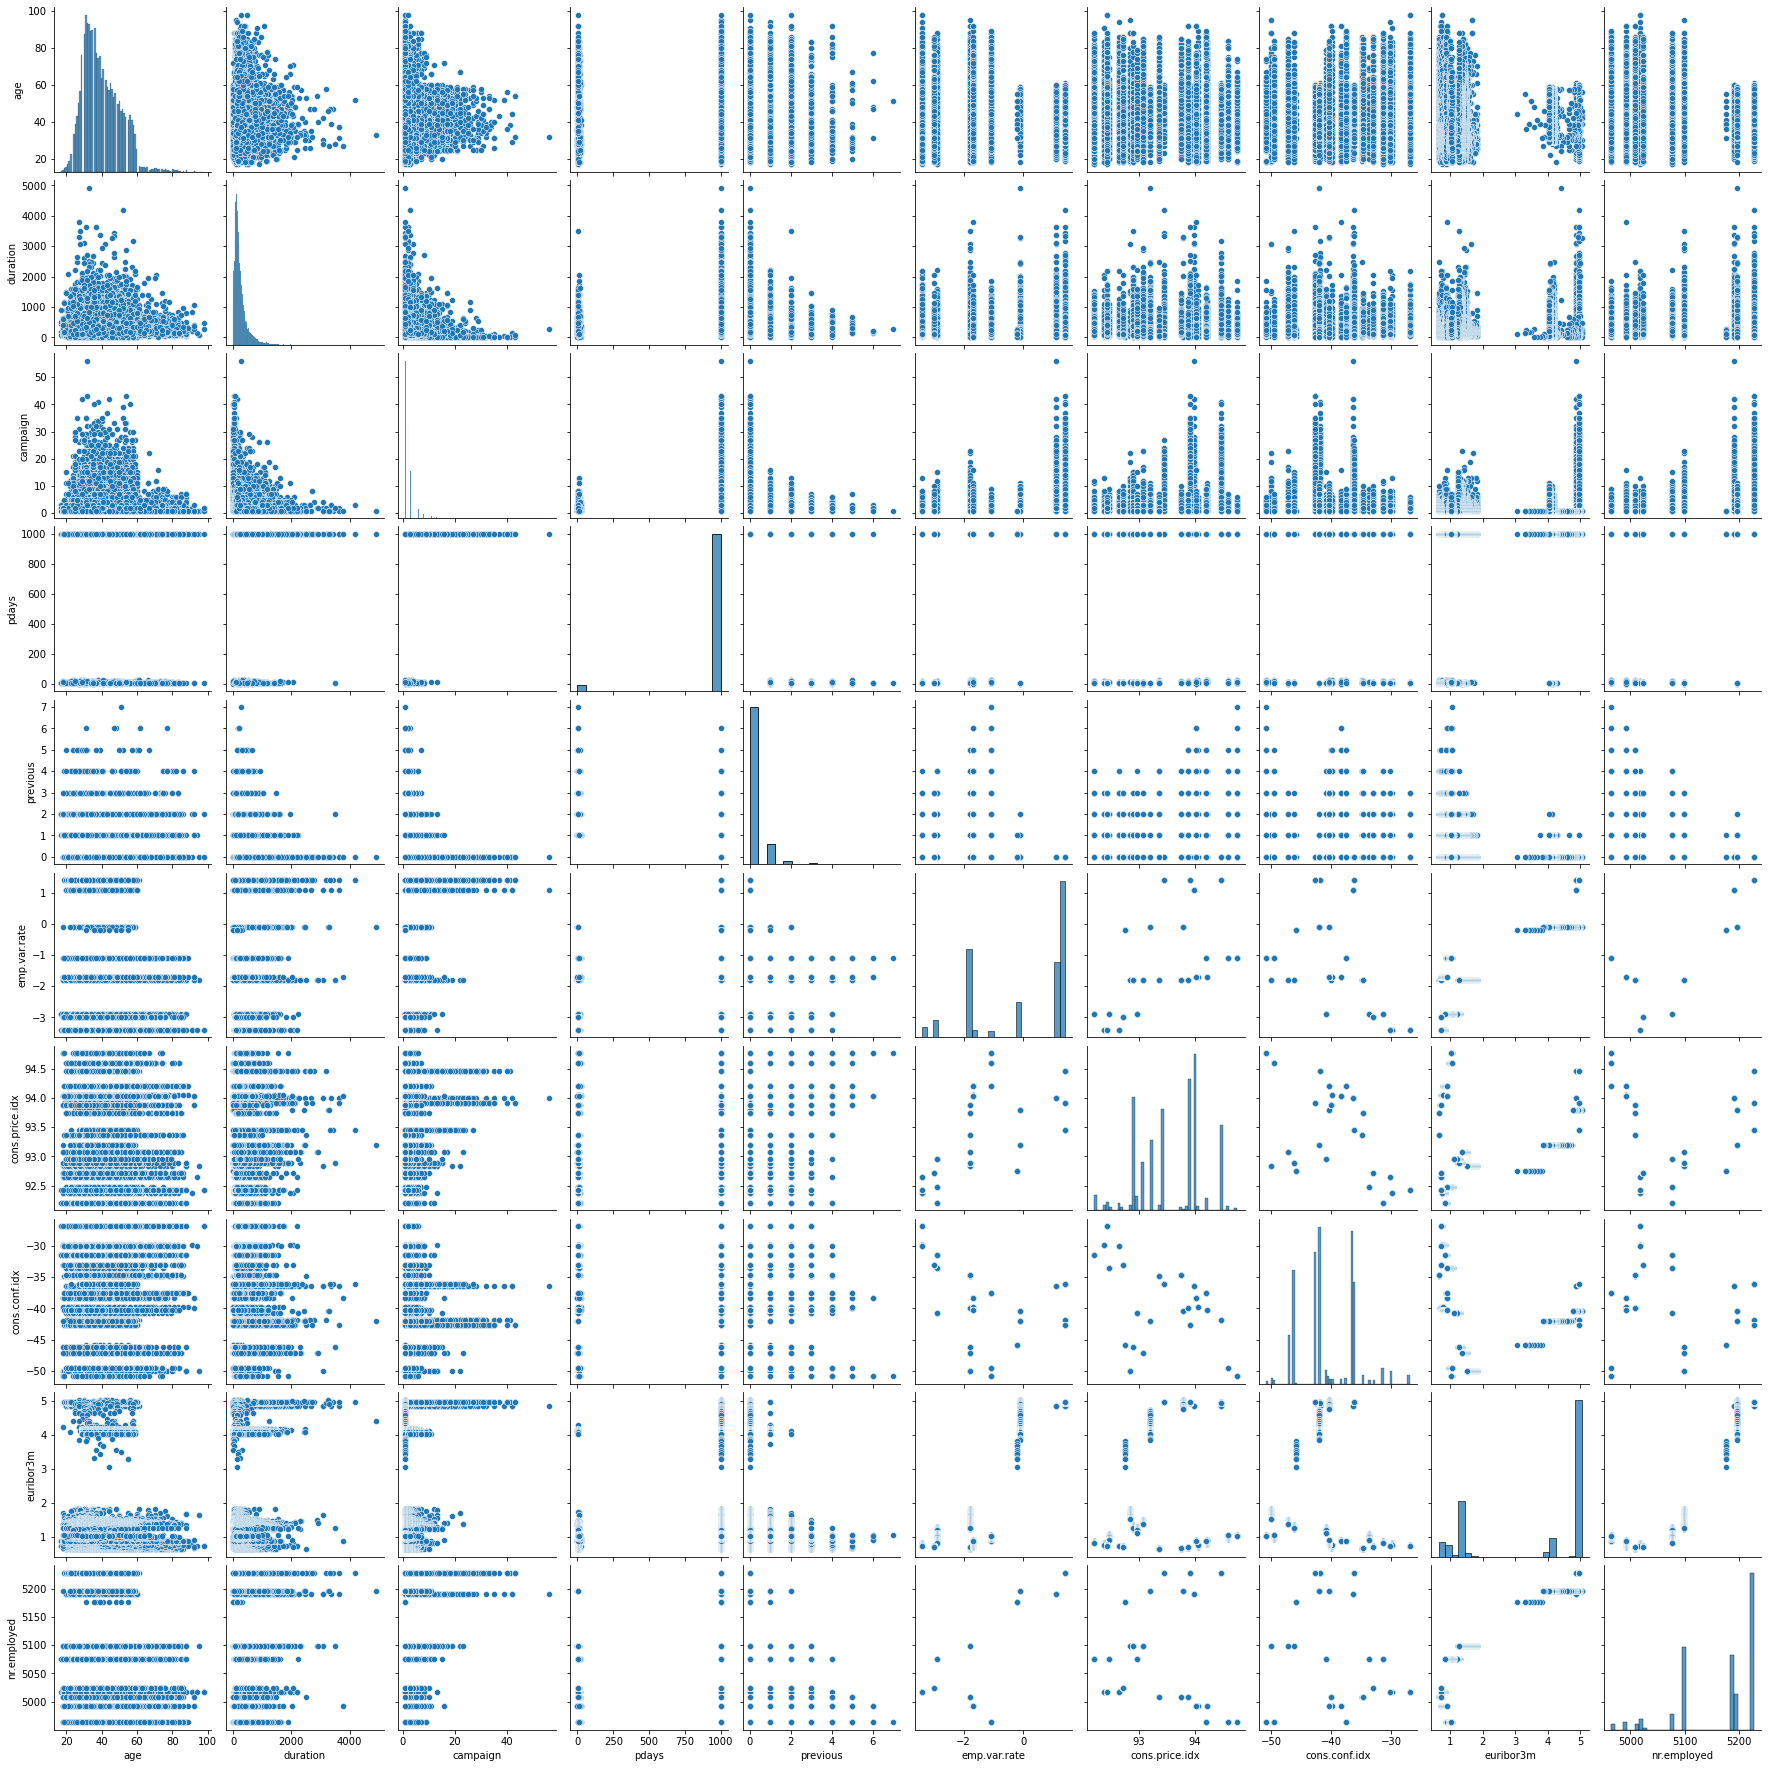

In [42]:
sns.pairplot(df)

In [43]:
X=pd.get_dummies(df)

In [44]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [48]:
scaled_X = scaler.fit_transform(X)

In [49]:
from sklearn.cluster import KMeans

In [51]:
#help(KMeans)

In [53]:
model = KMeans(n_clusters=2)

In [55]:
## fit_transform
cluster_labels =model.fit_predict(scaled_X)

In [56]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0])

In [57]:
X['Cluster'] = cluster_labels

In [59]:
#X

In [64]:
X.corr()['Cluster'].iloc[:-1].sort_values()

previous               -0.478416
poutcome_failure       -0.464246
contact_cellular       -0.410540
month_apr              -0.357885
subscribed_yes         -0.294887
                          ...   
poutcome_nonexistent    0.544318
cons.price.idx          0.679416
nr.employed             0.886085
emp.var.rate            0.932594
euribor3m               0.959234
Name: Cluster, Length: 65, dtype: float64

<AxesSubplot:>

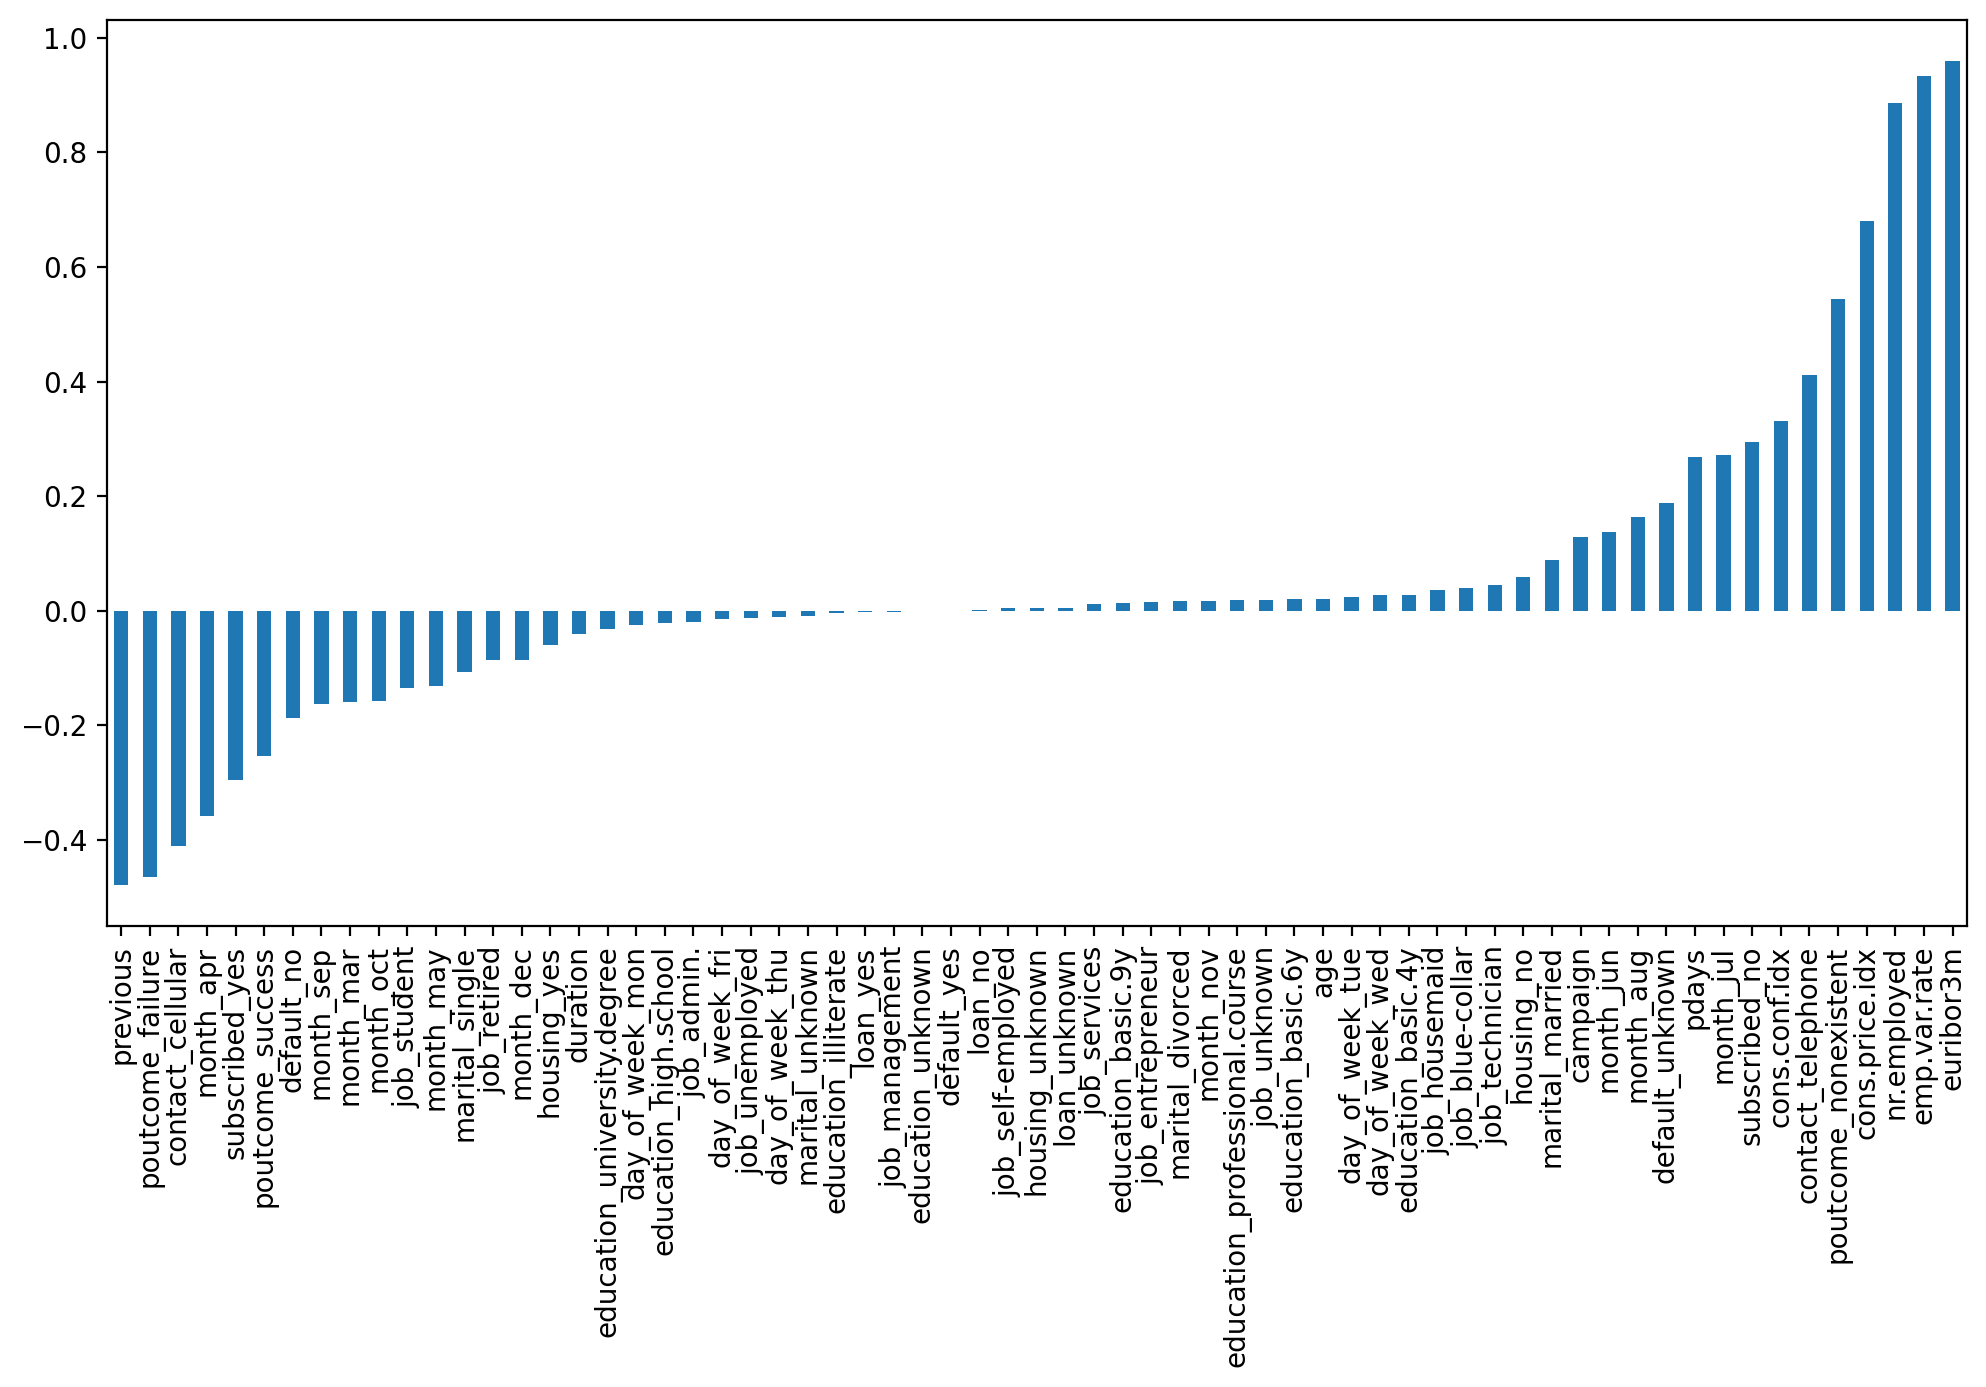

In [66]:
plt.figure(figsize=(12,6), dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

In [68]:
### Elbow method

ssd = []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)

In [69]:
ssd

[2469792.454328014,
 2370787.434652047,
 2271502.7007717513,
 2233121.188736728,
 2151167.859001185,
 2091403.019341863,
 2056790.6965926979,
 2000847.8290778867]

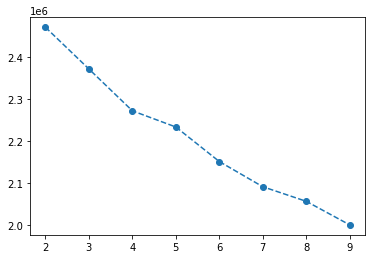

In [70]:
plt.plot(range(2,10), ssd, 'o--')

In [72]:
pd.Series(ssd).diff()

0             NaN
1   -99005.019676
2   -99284.733880
3   -38381.512035
4   -81953.329736
5   -59764.839659
6   -34612.322749
7   -55942.867515
dtype: float64